In [2]:
import os, sys, json
import pandas as pd
import geopandas as gpd
from shapely import geometry

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [3]:

colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [71]:
all_data_dirs = {
            'cities-N':              os.path.join('.','..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join('.','..','results_backup','simplify','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join('.','..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join('.','..','results_backup','simplify','cities_railways_edge_dataframe_alt.csv'),
            'coalmines-railways':    os.path.join('.','..','results_backup','simplify','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join('.','..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join('.','..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join('.','..','results_backup','simplify','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join('.','..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join('.','..','results_backup','simplify','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join('.','..','results_backup','oil_field_nodes_fixup.csv'),
            'pipelines-pipelines':   os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join('.','..','results_backup','simplify','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join('.','..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join('.','..','results_backup','simplify','port_pipeline_edge_dataframe.csv'),
            'ports-shipping':        os.path.join('.','..','results_backup','output','port_ship_edge_dataframe.csv'),
            'ports-railways':        os.path.join('.','..','results_backup','simplify','port_railway_edge_dataframe.csv'),
            'powerstn-N':            os.path.join('.','..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join('.','..','results_backup','simplify','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join('.','..','results_backup','simplify','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join('.','..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join('.','..','results_backup','simplify','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join('.','..','results_backup','simplify','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join('.','..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join('.','..','results_backup','simplify','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join('.','..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join('.','..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join('.','..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join('.','..','results_backup','simplify','well_pad_pipeline_edge_dataframe.csv'),
        }

In [72]:
c_r_post = pd.read_csv(all_data_dirs['railways-cities'])

In [73]:
c_post = pd.read_csv(all_data_dirs['cities-N'])
r_post = pd.read_csv(all_data_dirs['railways-N'])#os.path.join('.','..','results_backup','output','railway_nodes_dataframe.csv'))

In [74]:
r_post['coordinates'] = r_post['coordinates'].str.replace('(','[').str.replace(')',']')

In [75]:
c_r_post = c_r_post.merge(c_post[['CityNodeId:ID(CityNode)','coordinates']], how='left', left_on='CityNode:END_ID(CityNode)', right_on='CityNodeId:ID(CityNode)')

In [76]:
c_r_post = c_r_post.merge(r_post[['RailwayNodeID:ID(RailwayNode)','coordinates']], how='left', left_on='RailwayNode:START_ID(RailwayNode)', right_on='RailwayNodeID:ID(RailwayNode)')

In [77]:
c_r_post = c_r_post.rename(columns={'coordinates_x':'start_coordinates', 'coordinates_y':'end_coordinates'})

In [78]:
c_r_post

,Unnamed: 0,CityNode:END_ID(CityNode),RailwayNode:START_ID(RailwayNode),:TYPE,impedance,CityNodeId:ID(CityNode),start_coordinates,RailwayNodeID:ID(RailwayNode),end_coordinates
0,197791,city_node_10015,railway_node_7.315613211.5523087,CITY_RAILWAY_CONNECTOR,0,city_node_10015,"[7.292772298769956, 11.547653311483895]",railway_node_7.315613211.5523087,"[7.3156132, 11.5523087]"
1,197947,city_node_10026,railway_node_7.915000411.3344347,CITY_RAILWAY_CONNECTOR,0,city_node_10026,"[7.892634819601731, 11.356874011632286]",railway_node_7.915000411.3344347,"[7.9150004, 11.3344347]"
2,19367,city_node_1003,railway_node_-47.25535829975959-22.78025063779...,CITY_RAILWAY_CONNECTOR,0,city_node_1003,"[-47.25072293074102, -22.796014915825822]",railway_node_-47.25535829975959-22.78025063779...,"[-47.25535829975959, -22.780250637797888]"
3,198053,city_node_10031,railway_node_12.01354111.2736125,CITY_RAILWAY_CONNECTOR,0,city_node_10031,"[12.027417548437134, 11.206786252505685]",railway_node_12.01354111.2736125,"[12.013541, 11.2736125]"
4,198096,city_node_10039,railway_node_7.616998811.2023995,CITY_RAILWAY_CONNECTOR,0,city_node_10039,"[7.630459807658388, 11.214537567738205]",railway_node_7.616998811.2023995,"[7.6169988, 11.2023995]"
...,...,...,...,...,...,...,...,...,...
4263,19365,city_node_998,railway_node_-42.06846788577255-22.47088889203686,CITY_RAILWAY_CONNECTOR,0,city_node_998,"[-42.06892883878045, -22.432401915329145]",railway_node_-42.06846788577255-22.47088889203686,"[-42.06846788577255, -22.47088889203686]"
4264,197319,city_node_9981,railway_node_6.969706811.887333,CITY_RAILWAY_CONNECTOR,0,city_node_9981,"[6.893405117769672, 11.846367254346195]",railway_node_6.969706811.887333,"[6.9697068, 11.887333]"
4265,197336,city_node_9989,railway_node_13.103209311.8344228,CITY_RAILWAY_CONNECTOR,0,city_node_9989,"[13.147584159650059, 11.766774687687745]",railway_node_13.103209311.8344228,"[13.1032093, 11.8344228]"
4266,197657,city_node_9990,railway_node_8.592309812.0057055,CITY_RAILWAY_CONNECTOR,0,city_node_9990,"[8.593431162223446, 12.00241287418524]",railway_node_8.592309812.0057055,"[8.5923098, 12.0057055]"


In [79]:
for cc in ['start_coordinates', 'end_coordinates']:
    c_r_post[cc]=c_r_post[cc].apply(json.loads)

In [80]:
c_r_post['geometry'] = c_r_post[['start_coordinates', 'end_coordinates']].values.tolist()

In [81]:
c_r_post['geometry'] = c_r_post['geometry'].apply(geometry.LineString)

In [82]:
c_r_postgdf = gpd.GeoDataFrame(c_r_post, geometry=c_r_post['geometry'], crs={'init':'epsg:4326'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [83]:
ne = gpd.read_file('./../data/ne/ne_10m_countries.gpkg')

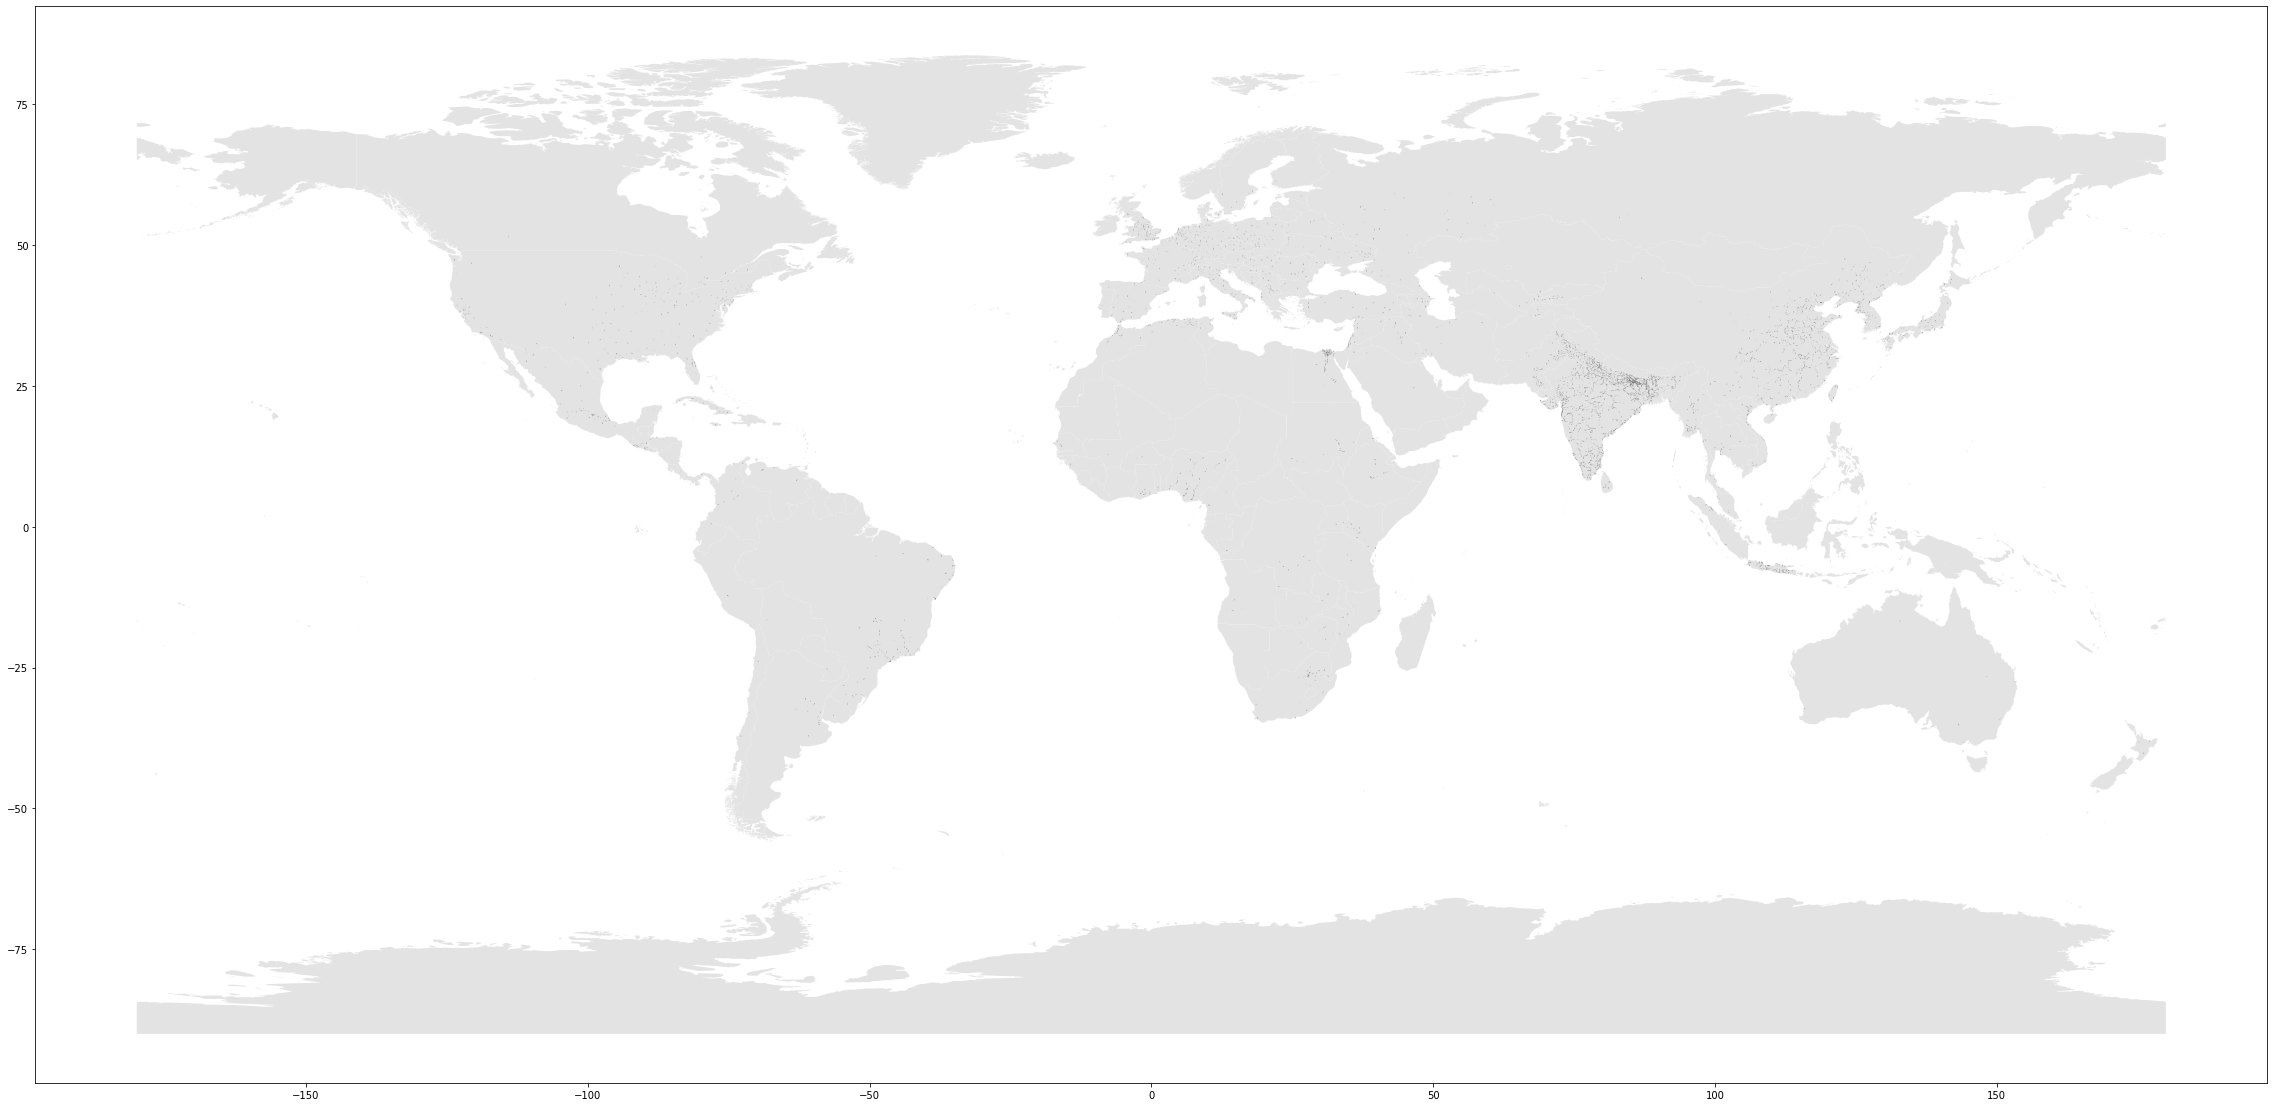

In [84]:
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
c_r_postgdf.plot(ax=ax, color=colors['railways'], alpha=0.9)

### Pre-simplify

In [27]:
c_r_pre = pd.read_csv(os.path.join('.','..','results_backup','output','cities_railways_edge_dataframe_alt.csv'))

In [28]:
c_pre = pd.read_csv(os.path.join('.','..','results_backup','output','cities_nodes_dataframe.csv'))
r_pre = pd.read_csv(os.path.join('.','..','results_backup','output','railway_nodes_dataframe.csv'))

In [29]:
r_pre['coordinates'] = r_pre[['lat','long']].values.tolist()

In [30]:
c_pre = c_pre.merge(c_post[['CityNodeId:ID(CityNode)','coordinates']], how='left',on='CityNodeId:ID(CityNode)')

In [31]:
c_pre['coordinates'] = c_pre['coordinates'].apply(json.loads)

In [32]:
c_r_pre = c_r_pre.merge(c_pre[['CityNodeId:ID(CityNode)','coordinates']], how='left',left_on='CityNode:END_ID(CityNode)',right_on='CityNodeId:ID(CityNode)')

In [33]:
c_r_pre = c_r_pre.merge(r_pre[['RailwayNodeID:ID(RailwayNode)','coordinates']], how='left',left_on='RailwayNode:START_ID(RailwayNode)',right_on='RailwayNodeID:ID(RailwayNode)')

In [34]:
c_r_pre = c_r_pre.rename(columns={'coordinates_x':'end_coordinates', 'coordinates_y':'start_coordinates'})

In [35]:
c_r_pre

,Unnamed: 0,CityNode:END_ID(CityNode),RailwayNode:START_ID(RailwayNode),:TYPE,impedance,CityNodeId:ID(CityNode),end_coordinates,RailwayNodeID:ID(RailwayNode),start_coordinates
0,76,city_node_76,railway_node_19.477934941.3163275,CITY_RAILWAY_CONNECTOR,0,city_node_76,"[19.561707497710845, 41.29191763621817]",railway_node_19.477934941.3163275,"[19.477934899999997, 41.3163275]"
1,76,city_node_76,railway_node_19.478668841.3161113,CITY_RAILWAY_CONNECTOR,0,city_node_76,"[19.561707497710845, 41.29191763621817]",railway_node_19.478668841.3161113,"[19.4786688, 41.316111299999996]"
2,76,city_node_76,railway_node_19.478761241.3160925,CITY_RAILWAY_CONNECTOR,0,city_node_76,"[19.561707497710845, 41.29191763621817]",railway_node_19.478761241.3160925,"[19.4787612, 41.316092499999996]"
3,76,city_node_76,railway_node_19.478817741.3161913,CITY_RAILWAY_CONNECTOR,0,city_node_76,"[19.561707497710845, 41.29191763621817]",railway_node_19.478817741.3161913,"[19.4788177, 41.31619129999999]"
4,76,city_node_76,railway_node_19.478977841.316047,CITY_RAILWAY_CONNECTOR,0,city_node_76,"[19.561707497710845, 41.29191763621817]",railway_node_19.478977841.316047,"[19.478977800000003, 41.316047]"
...,...,...,...,...,...,...,...,...,...
273573,13228,city_node_13228,railway_node_20.69148250016129342.245466499934146,CITY_RAILWAY_CONNECTOR,0,city_node_13228,"[20.752697840753427, 42.23426054348079]",railway_node_20.69148250016129342.245466499934146,"[20.691482500161293, 42.245466499934146]"
273574,13228,city_node_13228,railway_node_20.7033700003023442.23881750010726,CITY_RAILWAY_CONNECTOR,0,city_node_13228,"[20.752697840753427, 42.23426054348079]",railway_node_20.7033700003023442.23881750010726,"[20.703370000302343, 42.23881750010726]"
273575,13228,city_node_13228,railway_node_20.72016100003455542.22558649985989,CITY_RAILWAY_CONNECTOR,0,city_node_13228,"[20.752697840753427, 42.23426054348079]",railway_node_20.72016100003455542.22558649985989,"[20.720161000034555, 42.225586499859894]"
273576,13228,city_node_13228,railway_node_20.72608100070999342.22036549990785,CITY_RAILWAY_CONNECTOR,0,city_node_13228,"[20.752697840753427, 42.23426054348079]",railway_node_20.72608100070999342.22036549990785,"[20.726081000709996, 42.22036549990785]"


In [36]:
c_r_pre['geometry'] = c_r_pre[['start_coordinates', 'end_coordinates']].values.tolist()

In [37]:
c_r_pre['geometry'] = c_r_pre['geometry'].apply(geometry.LineString)

In [38]:
c_r_pregdf = gpd.GeoDataFrame(c_r_pre, geometry=c_r_pre['geometry'], crs={'init':'epsg:4326'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


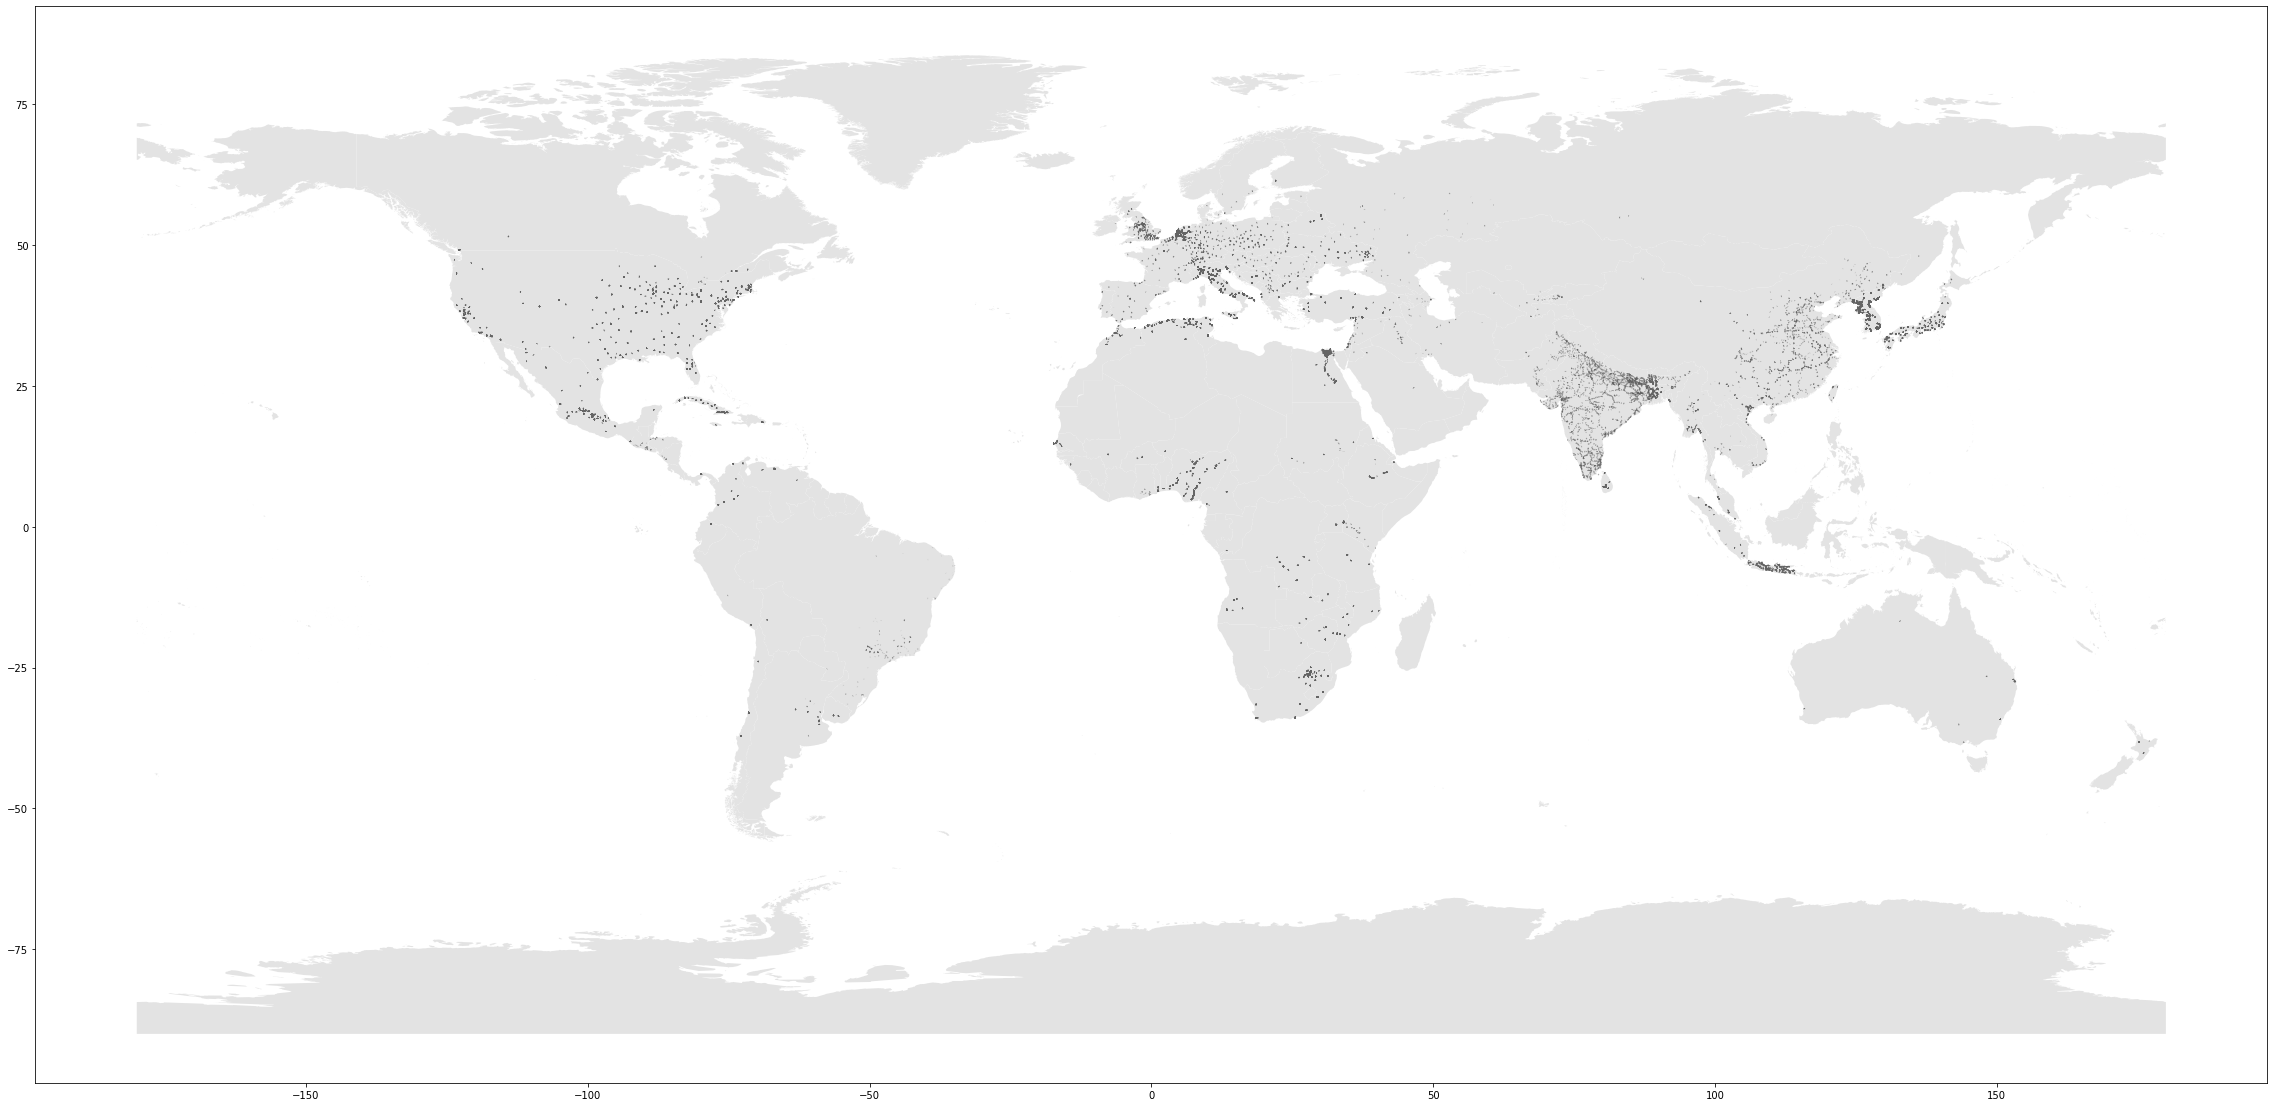

In [39]:
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
c_r_pregdf.plot(ax=ax, color=colors['railways'], alpha=0.2)

### Immensely bad!

### Fix IT!

approach:
- switch to global m crs, spatial join at 10km and write to out
- rerun simplify (NB + mp script)

In [71]:
c_pre['geometry'] = c_pre['coordinates'].apply(geometry.Point)

In [73]:
c_pre_gdf = gpd.GeoDataFrame(c_pre, geometry=c_pre['geometry'], crs={'init':'epsg:4326'})

In [74]:
r_pre['geometry'] = r_pre['coordinates'].apply(geometry.Point)

In [75]:
r_pre_gdf = gpd.GeoDataFrame(r_pre, geometry=r_pre['geometry'], crs={'init':'epsg:4326'})

In [76]:
c_pre_gdf = c_pre_gdf.to_crs({'init':'epsg:3395'})

,city_id,em_ed_manufacturing,em_ed_nonmetallic_minerals,em_ed_chemical_processes,em_ed_iron_steel_manufacturing,em_ed_nonferrous_metal_production,em_ed_solvent_products,em_sec_industry,en_sec_industry_coal,en_sec_industry_oil,...,en_sec_shipping_coal,en_sec_shipping_oil,en_sec_shipping_gas,total_oil_consumption,total_coal_consumption,total_gas_consumption,:LABEL,CityNodeId:ID(CityNode),coordinates,geometry
0,0,7435.119696,5710.450289,1207.577099,0.000000,4216.457203,3654.525399,22224.129686,81545.641518,1.936540e+05,...,0.0,-2.440781e+08,-55462.846110,2.463917e+08,8.207831e+04,62948.571487,CityNode,city_node_0,"[70.3302479906805, 37.76840637200007]",POINT (7829127.394 4520587.842)
1,1,12225.143075,308.723838,2015.415935,0.000000,0.000000,2220.106213,16769.389061,61530.894941,1.461231e+05,...,0.0,-2.077572e+08,-47209.488860,2.101727e+08,6.179216e+04,51333.251323,CityNode,city_node_1,"[69.91406604103679, 36.969858182710496]",POINT (7782798.231 4409207.327)
2,2,16182.671737,5835.555748,2649.997738,0.000000,4143.330319,5265.466931,34077.022473,125036.736999,2.969363e+05,...,0.0,-8.156813e+06,-1853.505285,1.771241e+07,1.259028e+05,12636.836585,CityNode,city_node_2,"[73.55249175449624, 37.13755340600005]",POINT (8187825.929 4432498.451)
3,3,15987.369870,5323.717696,2619.468710,0.000000,3756.309988,4997.704102,32684.570366,119927.497540,2.848029e+05,...,0.0,-1.683568e+08,-38256.383710,1.745643e+08,1.205722e+05,48017.782410,CityNode,city_node_3,"[68.66072971923218, 36.93501161119775]",POINT (7643277.470 4404374.001)
4,4,14045.258506,354.687512,2315.478330,0.000000,0.000000,2545.374377,19260.798726,70672.472239,1.678325e+05,...,0.0,-7.411473e+07,-16841.385307,7.879647e+07,7.095819e+04,21375.721907,CityNode,city_node_4,"[69.80669794370749, 36.44594427548354]",POINT (7770846.069 4336772.232)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13224,13224,176556.494449,5399.731586,46982.257122,0.000000,0.000000,16470.183642,245408.666799,469274.317549,2.707352e+06,...,0.0,0.000000e+00,0.000000,5.909157e+06,1.322445e+06,0.000000,CityNode,city_node_13224,"[21.18817158251325, 42.71947728233248]",POINT (2358656.471 5240374.127)
13225,13225,56301.390149,2340.561511,8012.142308,0.000000,0.000000,6345.434001,72999.527970,139590.847039,8.053318e+05,...,0.0,0.000000e+00,0.000000,2.623914e+06,5.197555e+05,0.000000,CityNode,city_node_13225,"[21.474142550585945, 42.47523793550003]",POINT (2390490.614 5203573.854)
13226,13226,176953.538629,29868.049050,13972.346608,0.000000,0.000000,10887.256444,231681.190731,443024.421620,2.555910e+06,...,0.0,0.000000e+00,0.000000,4.807168e+06,1.069115e+06,0.000000,CityNode,city_node_13226,"[21.16128285732996, 42.27012319793846]",POINT (2355663.232 5172780.223)
13227,13227,70775.814963,2611.834291,10278.495060,0.000000,0.000000,8154.529799,91820.674113,175580.939105,1.012967e+06,...,0.0,0.000000e+00,0.000000,4.334543e+06,7.413206e+05,0.000000,CityNode,city_node_13227,"[20.419487981870468, 42.41596506750004]",POINT (2273087.004 5194664.874)


In [77]:
r_pre_gdf = r_pre_gdf.to_crs({'init':'epsg:3395'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [80]:
r_pre_gdf['3395_x'] = r_pre_gdf.geometry.x

In [81]:
r_pre_gdf['3395_y'] = r_pre_gdf.geometry.y

In [82]:
r_pre_df = pd.DataFrame(r_pre_gdf)

In [85]:
c_pre_gdf = c_pre_gdf.to_crs({'init':'epsg:3395'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [88]:
c_pre_gdf['3395_x'] = c_pre_gdf.geometry.x
c_pre_gdf['3395_y'] = c_pre_gdf.geometry.y

In [89]:
c_pre_df = pd.DataFrame(c_pre_gdf)

In [90]:
c_pre_df

,city_id,em_ed_manufacturing,em_ed_nonmetallic_minerals,em_ed_chemical_processes,em_ed_iron_steel_manufacturing,em_ed_nonferrous_metal_production,em_ed_solvent_products,em_sec_industry,en_sec_industry_coal,en_sec_industry_oil,...,en_sec_shipping_gas,total_oil_consumption,total_coal_consumption,total_gas_consumption,:LABEL,CityNodeId:ID(CityNode),coordinates,geometry,3395_x,3395_y
0,0,7435.119696,5710.450289,1207.577099,0.000000,4216.457203,3654.525399,22224.129686,81545.641518,1.936540e+05,...,-55462.846110,2.463917e+08,8.207831e+04,62948.571487,CityNode,city_node_0,"[70.3302479906805, 37.76840637200007]",POINT (7829127.394 4520587.842),7.829127e+06,4.520588e+06
1,1,12225.143075,308.723838,2015.415935,0.000000,0.000000,2220.106213,16769.389061,61530.894941,1.461231e+05,...,-47209.488860,2.101727e+08,6.179216e+04,51333.251323,CityNode,city_node_1,"[69.91406604103679, 36.969858182710496]",POINT (7782798.231 4409207.327),7.782798e+06,4.409207e+06
2,2,16182.671737,5835.555748,2649.997738,0.000000,4143.330319,5265.466931,34077.022473,125036.736999,2.969363e+05,...,-1853.505285,1.771241e+07,1.259028e+05,12636.836585,CityNode,city_node_2,"[73.55249175449624, 37.13755340600005]",POINT (8187825.929 4432498.451),8.187826e+06,4.432498e+06
3,3,15987.369870,5323.717696,2619.468710,0.000000,3756.309988,4997.704102,32684.570366,119927.497540,2.848029e+05,...,-38256.383710,1.745643e+08,1.205722e+05,48017.782410,CityNode,city_node_3,"[68.66072971923218, 36.93501161119775]",POINT (7643277.470 4404374.001),7.643277e+06,4.404374e+06
4,4,14045.258506,354.687512,2315.478330,0.000000,0.000000,2545.374377,19260.798726,70672.472239,1.678325e+05,...,-16841.385307,7.879647e+07,7.095819e+04,21375.721907,CityNode,city_node_4,"[69.80669794370749, 36.44594427548354]",POINT (7770846.069 4336772.232),7.770846e+06,4.336772e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13224,13224,176556.494449,5399.731586,46982.257122,0.000000,0.000000,16470.183642,245408.666799,469274.317549,2.707352e+06,...,0.000000,5.909157e+06,1.322445e+06,0.000000,CityNode,city_node_13224,"[21.18817158251325, 42.71947728233248]",POINT (2358656.471 5240374.127),2.358656e+06,5.240374e+06
13225,13225,56301.390149,2340.561511,8012.142308,0.000000,0.000000,6345.434001,72999.527970,139590.847039,8.053318e+05,...,0.000000,2.623914e+06,5.197555e+05,0.000000,CityNode,city_node_13225,"[21.474142550585945, 42.47523793550003]",POINT (2390490.614 5203573.854),2.390491e+06,5.203574e+06
13226,13226,176953.538629,29868.049050,13972.346608,0.000000,0.000000,10887.256444,231681.190731,443024.421620,2.555910e+06,...,0.000000,4.807168e+06,1.069115e+06,0.000000,CityNode,city_node_13226,"[21.16128285732996, 42.27012319793846]",POINT (2355663.232 5172780.223),2.355663e+06,5.172780e+06
13227,13227,70775.814963,2611.834291,10278.495060,0.000000,0.000000,8154.529799,91820.674113,175580.939105,1.012967e+06,...,0.000000,4.334543e+06,7.413206e+05,0.000000,CityNode,city_node_13227,"[20.419487981870468, 42.41596506750004]",POINT (2273087.004 5194664.874),2.273087e+06,5.194665e+06


In [124]:
def _match_rail(row):
    if row['city_id'] %100==0:
        print (row['city_id'])
    bool_ind = (((r_pre_df['3395_x'] - row['3395_x'])**2 + (r_pre_df['3395_y'] - row['3395_y'])**2)**(1/2))<10000
    return r_pre_df[bool_ind]['RailwayNodeID:ID(RailwayNode)'].values.tolist()

In [125]:
c_pre_df['matched_railways'] = c_pre_df.apply(_match_rail, axis=1)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200


In [127]:
matched_df = c_pre_df.copy()

In [130]:
matched_df = matched_df[['CityNodeId:ID(CityNode)','matched_railways']]

In [132]:
matched_df = matched_df.explode(column='matched_railways')

In [136]:
matched_df = matched_df.dropna(subset=['matched_railways'])

In [137]:
matched_df.columns

Index(['CityNodeId:ID(CityNode)', 'matched_railways'], dtype='object')

In [139]:
matched_df = matched_df.rename(columns={'CityNodeId:ID(CityNode)':'CityNode:END_ID(CityNode)', 'matched_railways':'RailwayNode:START_ID(RailwayNode)'})

In [140]:
matched_df[':TYPE']='CITY_RAILWAY_CONNECTOR'
matched_df['impedance']=0

In [142]:
matched_df.to_csv('./../results_backup/output/cities_railways_edge_dataframe_alt.csv')